**`continuous_probabilistic_methods.py` or `continuous_probabilistic_methods.ipynb`**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Define a function named get_lower_and_upper_bounds that has two arguments:
- The first argument is a pandas Series. 
- The second argument is the multiplier, which should have a default argument of 1.5.

In [4]:
def get_lower_and_upper_bounds(df, feature, m = 1.5):
    '''
    get_lower_and_upper_bounds will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    - default multiplier is '1.5'
    '''
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    
    iqr = q3 - q1
    
    upper_bound = q3 + (m * iqr)
    lower_bound = q1 - (m * iqr)
    
    return upper_bound, lower_bound

1. Using [`lemonade.csv`](https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv) dataset and focusing on continuous variables:

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [7]:
columns = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']


Temperature


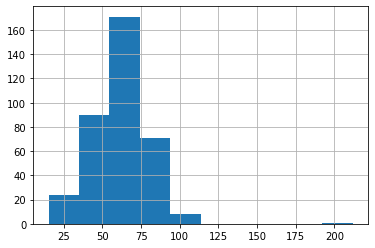

Rainfall


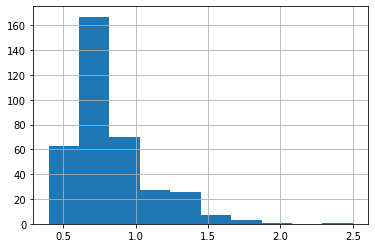

Flyers


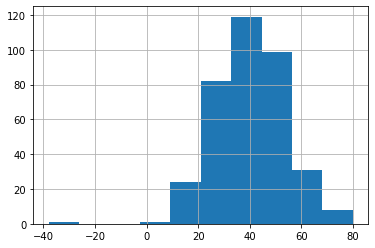

Price


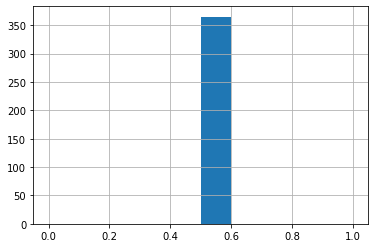

Sales


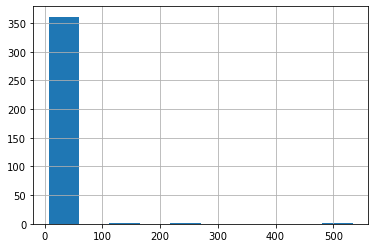

In [10]:
for col in columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

Temperature


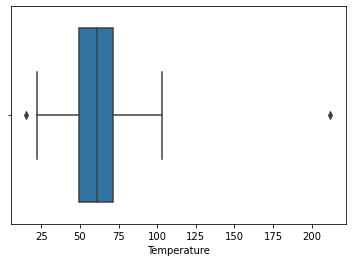

Rainfall


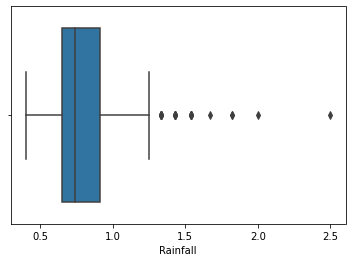

Flyers


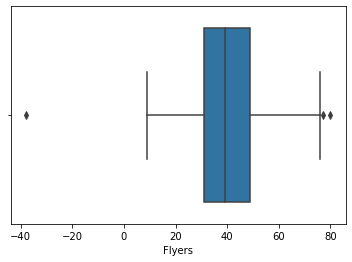

Price


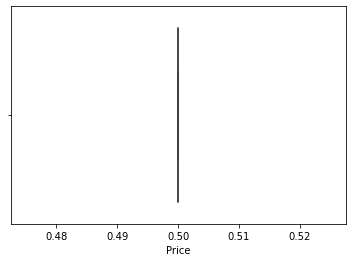

Sales


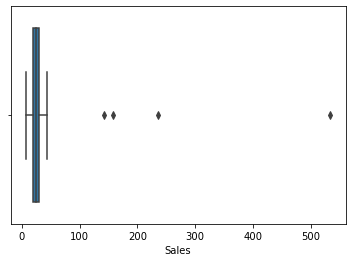

In [44]:
for col in columns:
    sns.boxplot(x=col, data=df)
    print(col)
    plt.show()

<AxesSubplot:>

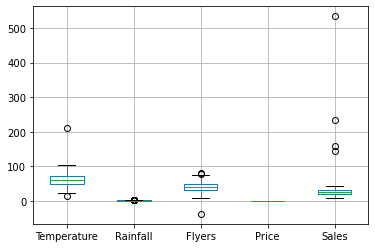

In [46]:
df.boxplot(column = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

1.1 Use the IQR Range Rule and the upper and lower bounds to:
- identify the **below** outliers of each column of `lemonade.csv`, using the multiplier of 1.5. 
    - Do these lower outliers make sense?
    - Which outliers should be kept? <font color="green">I think Rainfall & Price can be left alone.</font>
    
- identify the **above** outliers of each column of `lemonade.csv`, using the multiplier of 1.5. 
    - Do these lower outliers make sense?
    - Which outliers should be kept? <font color="green">I think Flyers & Price can be left alone.</font>

In [47]:
for col in columns:
    upper_bound, lower_bound = get_lower_and_upper_bounds(df, col, m = 1.5)
    print(col)
    print(upper_bound, lower_bound)

Temperature
104.7 16.700000000000003
Rainfall
1.3 0.26
Flyers
76.0 4.0
Price
0.5 0.5
Sales
45.0 5.0


Temperature


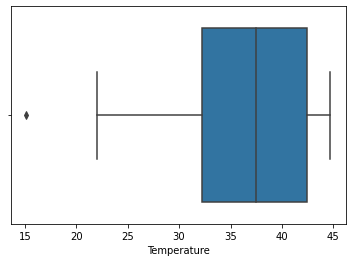

Rainfall


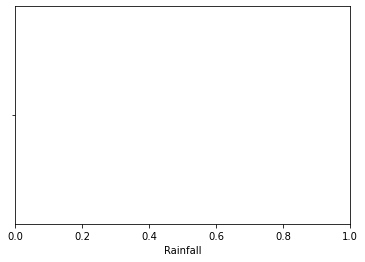

Flyers


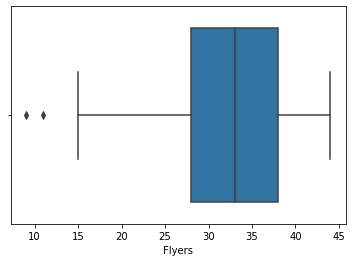

Price


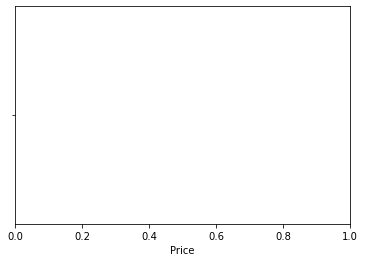

Sales


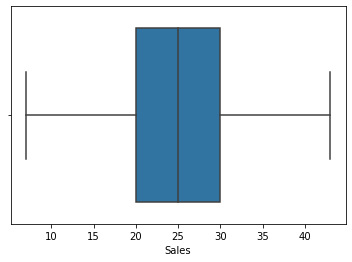

In [48]:
for col in columns:
    sns.boxplot(x=col, data= df[(df[col] < upper_bound) & (df[col] > lower_bound)])
    print(col)
    plt.show()

1.2 Using the multiplier of **3**, IQR Range Rule, and the lower and upper bounds, identify the outliers **below** the lower bound in each column of `lemonade.csv`. 

1.2 Using the multiplier of **3**, IQR Range Rule, and the upper and lower bounds to:
- identify the **below** outliers of each column of `lemonade.csv`. 
    - Do these lower outliers make sense?
    - Which outliers should be kept? <font color="green">Price.</font>
    
- identify the **above** outliers of each column of `lemonade.csv`. 
    - Do these lower outliers make sense?
    - Which outliers should be kept? <font color="green">Rainfall, Flyers & Price .</font>

<AxesSubplot:>

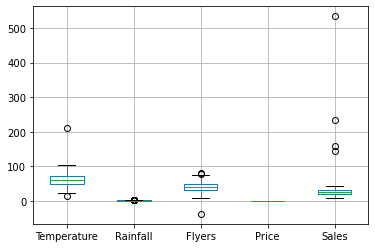

In [49]:
df.boxplot(column = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [19]:
for col in columns:
    upper_bound, lower_bound = get_lower_and_upper_bounds(df, col, m = 3)
    print(col)
    print(upper_bound, lower_bound)

Temperature
137.7 -16.299999999999997
Rainfall
1.69 -0.13
Flyers
103.0 -23.0
Price
0.5 0.5
Sales
60.0 -10.0


Temperature


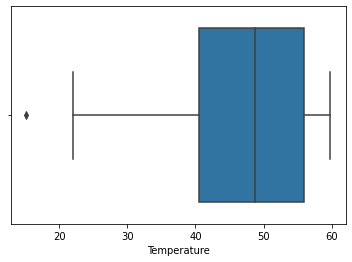

Rainfall


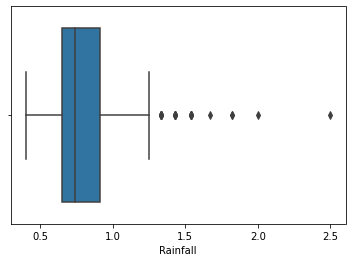

Flyers


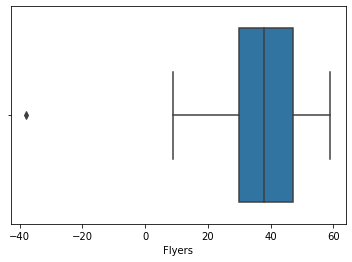

Price


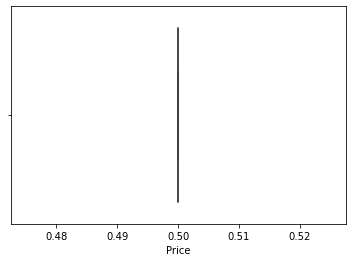

Sales


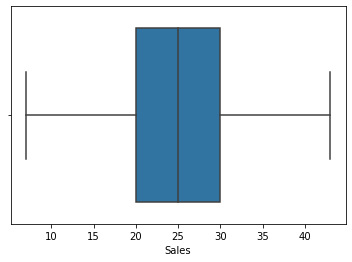

In [24]:
for col in columns:
    sns.boxplot(x=col, data=df[df[col] < upper_bound])
    print(col)
    plt.show()

In [35]:
df[(df[col] < upper_bound) & (df[col] > lower_bound)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


Temperature


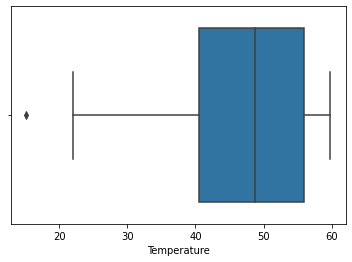

Rainfall


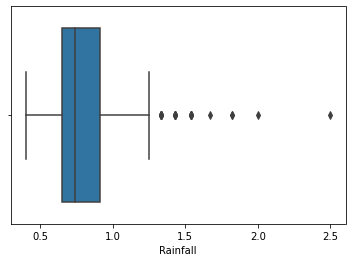

Flyers


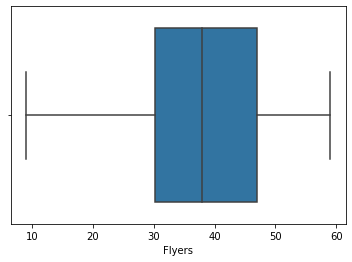

Price


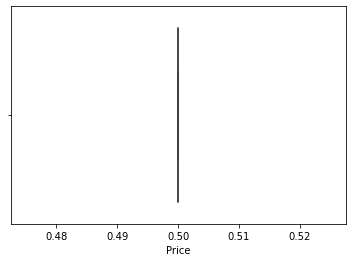

Sales


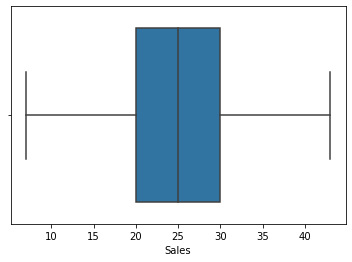

In [43]:
for col in columns:
    sns.boxplot(x=col, data= df[(df[col] < upper_bound) & (df[col] > lower_bound)])
    print(col)
    plt.show()

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
<font color="green">
- Temperature
- Flyers
</font>

Temperature


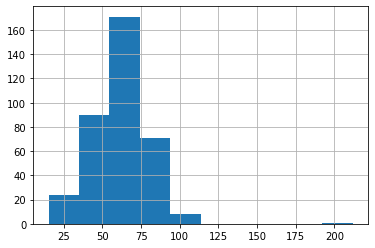

Rainfall


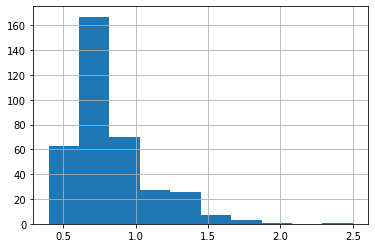

Flyers


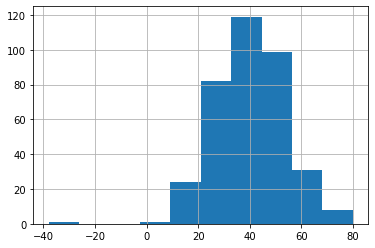

Price


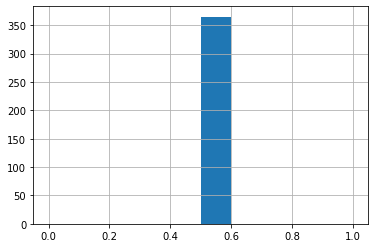

Sales


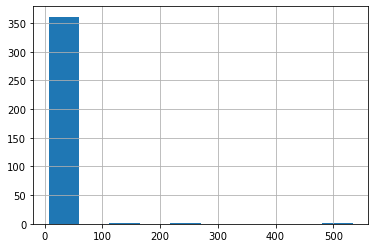

In [50]:
for col in columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

2.1 Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?<font color="green"></font>

In [58]:
for col in columns:
    z_scores = pd.Series((df[col] - df[col].mean()) / df[col].std())
    colname = 'z_scores_' + str(col)
    df[colname] = z_scores
    
    print(col)
    print(df[z_scores.abs() >= 2])


Temperature
         Date       Day  Temperature  Rainfall  Flyers  Price  Sales  \
41    2/11/17  Saturday        212.0      0.91      35    0.5     21   
166   6/16/17    Friday         99.3      0.47      77    0.5     41   
176   6/26/17    Monday        102.6      0.47      60    0.5     42   
181    7/1/17  Saturday        102.9      0.47      59    0.5    143   
190   7/10/17    Monday         98.0      0.49      66    0.5     40   
198   7/18/17   Tuesday         99.3      0.47      76    0.5     41   
202   7/22/17  Saturday         99.6      0.47      49    0.5     42   
207   7/27/17  Thursday         97.9      0.47      74    0.5     43   
338   12/5/17   Tuesday         22.0      1.82      11    0.5     10   
364  12/31/17    Sunday         15.1      2.50       9    0.5      7   

     z_scores_Temperature  
41               8.336627  
166              2.105251  
176              2.287714  
181              2.304301  
190              2.033372  
198              2.105251  

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv